# XYZ Corp Ltd - Loan Prediction

In [1]:
### Understanding the problem and our objective

# In this project,We will behaving as a Loan issuer and will manage the credit risk by using the past data 
# and deciding whom to give the loan in the future. 
# The text files contain complete loan data for all loans issued by XYZ Corp. through 2007-2015. 
# The data contains the indicator of default, payment information, credit history, etc.
# Based on the data that is available during loan application build a model to predict default in the future. 
# This will help the company in deciding whether or not to pass the loan.

In [2]:
#Importing Required packages

get_ipython().magic('matplotlib inline')
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt        # For plotting graphs
import math
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [3]:
## Reading the XYZ Corporation Lending Data file from .txt file

pd.set_option("display.max_columns",None)

credit_data = pd.read_table('D:\Aman\Python\Python Scripts\Project\XYZCorp_LendingData.txt', 
                            low_memory = False, delimiter= '\t')


# Understanding the Data 

In [4]:
# Making copy of Original data
credit_data_original = credit_data.copy()

In [5]:
# Features in dataset
credit_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', 'tot_col

In [6]:
# Printing Datatypes of each variable
credit_data.dtypes

id                               int64
member_id                        int64
loan_amnt                      float64
funded_amnt                    float64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                         object
pymnt_plan                      object
desc                            object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                    float64
earliest_cr_line                object
inq_last_6mths           

In [7]:
# Shape of dataset
credit_data.shape

(855969, 73)

In [8]:
# Top 5 rows to look at the data set
credit_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [9]:
## Exploratory Data Analyis (EDA)
# 1) Look at the Data and variables
# 2) Data Cleaning 
#      Remove those variables having more than 75% of missing values.
# 3) Missing Values treatment with Mean/ Mode
# 4) Dropping irrelevant variables


In [10]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
id                             855969 non-null int64
member_id                      855969 non-null int64
loan_amnt                      855969 non-null float64
funded_amnt                    855969 non-null float64
funded_amnt_inv                855969 non-null float64
term                           855969 non-null object
int_rate                       855969 non-null float64
installment                    855969 non-null float64
grade                          855969 non-null object
sub_grade                      855969 non-null object
emp_title                      806526 non-null object
emp_length                     812908 non-null object
home_ownership                 855969 non-null object
annual_inc                     855969 non-null float64
verification_status            855969 non-null object
issue_d                        855969 non-null object
pymnt_plan           

In [11]:
## To check all NULL values
credit_data_null = credit_data.isnull().sum(axis=0).sort_values( ascending=False)/float(len(credit_data)) 

In [12]:
credit_data_null

dti_joint                      0.999486
verification_status_joint      0.999484
annual_inc_joint               0.999484
il_util                        0.986438
mths_since_rcnt_il             0.984890
total_bal_il                   0.984476
inq_last_12m                   0.984476
open_acc_6m                    0.984476
open_il_6m                     0.984476
open_il_24m                    0.984476
open_il_12m                    0.984476
open_rv_12m                    0.984476
open_rv_24m                    0.984476
max_bal_bc                     0.984476
all_util                       0.984476
inq_fi                         0.984476
total_cu_tl                    0.984476
desc                           0.857691
mths_since_last_record         0.846742
mths_since_last_major_derog    0.750997
mths_since_last_delinq         0.513818
next_pymnt_d                   0.295538
tot_cur_bal                    0.078640
tot_coll_amt                   0.078640
total_rev_hi_lim               0.078640


In [13]:
# NULL values greater than 75% will be removed
credit_data_null[credit_data_null > 0.75]

dti_joint                      0.999486
verification_status_joint      0.999484
annual_inc_joint               0.999484
il_util                        0.986438
mths_since_rcnt_il             0.984890
total_bal_il                   0.984476
inq_last_12m                   0.984476
open_acc_6m                    0.984476
open_il_6m                     0.984476
open_il_24m                    0.984476
open_il_12m                    0.984476
open_rv_12m                    0.984476
open_rv_24m                    0.984476
max_bal_bc                     0.984476
all_util                       0.984476
inq_fi                         0.984476
total_cu_tl                    0.984476
desc                           0.857691
mths_since_last_record         0.846742
mths_since_last_major_derog    0.750997
dtype: float64

In [14]:
credit_data.drop(credit_data_null[credit_data_null>0.75].index, axis = 1, inplace = True)
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 53 columns):
id                            855969 non-null int64
member_id                     855969 non-null int64
loan_amnt                     855969 non-null float64
funded_amnt                   855969 non-null float64
funded_amnt_inv               855969 non-null float64
term                          855969 non-null object
int_rate                      855969 non-null float64
installment                   855969 non-null float64
grade                         855969 non-null object
sub_grade                     855969 non-null object
emp_title                     806526 non-null object
emp_length                    812908 non-null object
home_ownership                855969 non-null object
annual_inc                    855969 non-null float64
verification_status           855969 non-null object
issue_d                       855969 non-null object
pymnt_plan                    855969 

In [15]:
## All NULL values greater than 75% will get removed and now check how many columns are remaining
credit_data.shape

(855969, 53)

In [16]:
## Few variables are having Unique value which are a bit misleading for Analysis 
## So those variables need to be removed
## Variable - Policy id has same value 1 for all rows
## Title , Emp_Title, Zip Code is not needed 
## Application_Type, acc_now_delinq has same value for almost 99% records
## id and member_id is almost same

credit_data_remove = ['policy_code', 'pymnt_plan', 'id', 'member_id', 'application_type', 
                      'acc_now_delinq','emp_title', 'zip_code','title']


In [17]:
## Drop those variable which are not relevant for Analysis
credit_data.drop( credit_data_remove , axis = 1, inplace = True )

In [18]:
# After dropping , remaining columns
credit_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'purpose', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'default_ind'],
      dtype='object')

In [19]:
## Missing Value treatment
# Categoricals values to be filled with Mode and Interger variable with Mean value

mis_val_per=100*credit_data.isnull().sum()/len(credit_data)
mis_val_per

loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_length                     5.030673
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
purpose                        0.000000
addr_state                     0.000000
dti                            0.000000
delinq_2yrs                    0.000000
earliest_cr_line               0.000000
inq_last_6mths                 0.000000
mths_since_last_delinq        51.381767
open_acc                       0.000000
pub_rec                        0.000000
revol_bal                      0.000000
revol_util                     0.052105
total_acc                      0.000000


In [20]:
credit_data.isnull().sum()/len(credit_data)< 0.08

loan_amnt                      True
funded_amnt                    True
funded_amnt_inv                True
term                           True
int_rate                       True
installment                    True
grade                          True
sub_grade                      True
emp_length                     True
home_ownership                 True
annual_inc                     True
verification_status            True
issue_d                        True
purpose                        True
addr_state                     True
dti                            True
delinq_2yrs                    True
earliest_cr_line               True
inq_last_6mths                 True
mths_since_last_delinq        False
open_acc                       True
pub_rec                        True
revol_bal                      True
revol_util                     True
total_acc                      True
initial_list_status            True
out_prncp                      True
out_prncp_inv               

In [21]:
##Fill the variable 'mths_since_last_delinq' with mean value as its an Integer variable
credit_data['mths_since_last_delinq']=credit_data['mths_since_last_delinq'].fillna(credit_data['mths_since_last_delinq'].mean())

In [22]:
# 'next_pymnt_d'is a categorical variable.
# So we check and fill according to MODE
credit_data['next_pymnt_d'].value_counts()

Feb-2016    534094
Jan-2016     68838
Mar-2016        66
Name: next_pymnt_d, dtype: int64

In [23]:
# As we can see tha Feb-2016 has higher number of count so we fill 'next_pymnt_d' missing values with 'Feb-2016' value
nxt = credit_data['next_pymnt_d'].mode()
nxt

0    Feb-2016
dtype: object

In [24]:
credit_data = credit_data.fillna({'next_pymnt_d' : 'Feb-2016'})

In [25]:
mis_val_per=100*credit_data.isnull().sum()/len(credit_data)
mis_val_per

loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_length                    5.030673
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
purpose                       0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line              0.000000
inq_last_6mths                0.000000
mths_since_last_delinq        0.000000
open_acc                      0.000000
pub_rec                       0.000000
revol_bal                     0.000000
revol_util                    0.052105
total_acc                     0.000000
initial_list_status      

In [26]:
credit_data=credit_data.dropna()

In [27]:
credit_data.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
mths_since_last_delinq        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_re

In [28]:
credit_data.shape

(739035, 44)

In [29]:
# Variable Transformations
# 
# To make a modelling ready dataset, we have to transform a few variables
# 
# A summary of the operations performed:
# 
# - Strip months from term and make it an integer
# - Extract numbers from emp_length and fill missing values with the median. If emp_length == 10+ years then leave it as 10
# - Transform datetimes to a Period


In [30]:
# Extract months from 'term' and change it to an integer value 

credit_data['term'] = credit_data['term'].str.split(' ').str[1]

In [31]:
# extract numbers from emp_length and fill missing values with the median
credit_data['emp_length'] = credit_data['emp_length'].str.extract('(\d+)').astype(float)
credit_data['emp_length'] = credit_data['emp_length'].fillna(credit_data.emp_length.median())

In [32]:
col_dates = credit_data.dtypes[credit_data.dtypes == 'datetime64[ns]'].index

In [33]:
for d in col_dates:
    credit_data[d] = credit_data[d].dt.to_period('M')

In [34]:
credit_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
39694,27050.0,27050.0,27050.0,36,10.99,885.46,B,B2,10.0,OWN,55000.0,Verified,Dec-2013,debt_consolidation,MI,22.87,0.0,Oct-1986,0.0,34.149943,14.0,0.0,36638.0,61.2,27.0,w,10018.90,10018.90,21251.04,21251.04,17031.10,4219.94,0.0,0.0,0.0,Jan-2016,885.46,Feb-2016,Dec-2015,0.0,0.0,114834.0,59900.0,0
39695,9750.0,9750.0,9750.0,36,13.98,333.14,C,C1,1.0,RENT,26000.0,Not Verified,Dec-2013,debt_consolidation,CA,25.12,0.0,Jan-2007,0.0,34.149943,12.0,0.0,7967.0,52.8,28.0,f,3710.96,3710.96,7994.83,7994.83,6039.04,1955.79,0.0,0.0,0.0,Jan-2016,333.14,Feb-2016,Jan-2016,0.0,0.0,14123.0,15100.0,0
39696,12000.0,12000.0,12000.0,36,6.62,368.45,A,A2,10.0,MORTGAGE,105000.0,Not Verified,Dec-2013,debt_consolidation,CT,14.05,0.0,Mar-1994,1.0,43.000000,12.0,0.0,13168.0,21.6,22.0,w,4266.62,4266.62,8842.80,8842.80,7733.38,1109.42,0.0,0.0,0.0,Jan-2016,368.45,Feb-2016,Jan-2016,0.0,0.0,267646.0,61100.0,0
39697,12000.0,12000.0,12000.0,36,13.53,407.40,B,B5,10.0,RENT,40000.0,Source Verified,Dec-2013,debt_consolidation,NM,16.94,0.0,Oct-1998,0.0,53.000000,7.0,2.0,5572.0,68.8,32.0,w,0.00,0.00,13359.77,13359.77,11999.99,1359.78,0.0,0.0,0.0,Sep-2015,119.17,Feb-2016,Jan-2016,0.0,15386.0,13605.0,8100.0,0
39698,15000.0,15000.0,15000.0,36,8.90,476.30,A,A5,2.0,MORTGAGE,63000.0,Not Verified,Dec-2013,debt_consolidation,FL,16.51,0.0,Mar-1998,0.0,34.000000,8.0,0.0,11431.0,74.2,29.0,w,5449.27,5449.27,11431.20,11431.20,9550.73,1880.47,0.0,0.0,0.0,Jan-2016,476.30,Feb-2016,Jan-2016,0.0,1514.0,272492.0,15400.0,0


In [35]:
credit_data.tail()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
855964,10000.0,10000.0,10000.0,36,11.99,332.10,B,B5,8.0,RENT,31000.0,Verified,Jan-2015,debt_consolidation,CA,28.69,0.0,Sep-2004,0.0,34.149943,9.0,1.0,14037.0,82.1,15.0,f,7055.47,7055.47,3971.88,3971.88,2944.53,1027.35,0.0,0.0,0.0,Jan-2016,332.10,Feb-2016,Jan-2016,0.0,0.0,25274.0,17100.0,0
855965,24000.0,24000.0,24000.0,36,11.99,797.03,B,B5,10.0,MORTGAGE,79000.0,Verified,Jan-2015,home_improvement,NJ,3.90,0.0,Mar-1974,1.0,26.000000,5.0,0.0,8621.0,84.5,23.0,f,16933.26,16933.26,9532.39,9532.39,7066.74,2465.65,0.0,0.0,0.0,Jan-2016,797.03,Feb-2016,Jan-2016,0.0,0.0,140285.0,10200.0,0
855966,13000.0,13000.0,13000.0,60,15.99,316.07,D,D2,5.0,RENT,35000.0,Verified,Jan-2015,debt_consolidation,TN,30.90,0.0,Sep-2003,0.0,34.149943,9.0,1.0,11031.0,61.3,22.0,w,11155.50,11155.50,3769.74,3769.74,1844.50,1925.24,0.0,0.0,0.0,Jan-2016,316.07,Feb-2016,Jan-2016,0.0,0.0,34178.0,18000.0,0
855967,12000.0,12000.0,12000.0,60,19.99,317.86,E,E3,1.0,RENT,64400.0,Source Verified,Jan-2015,debt_consolidation,MA,27.19,1.0,Oct-2003,2.0,22.000000,17.0,0.0,8254.0,30.6,20.0,w,10447.31,10447.31,3787.67,3787.67,1552.69,2234.98,0.0,0.0,0.0,Jan-2016,317.86,Feb-2016,Jan-2016,1.0,0.0,58418.0,27000.0,0
855968,20000.0,20000.0,20000.0,36,11.99,664.20,B,B5,10.0,RENT,100000.0,Verified,Jan-2015,credit_card,FL,10.83,0.0,Dec-2001,1.0,34.149943,8.0,1.0,33266.0,79.8,10.0,f,14110.94,14110.94,7943.76,7943.76,5889.06,2054.70,0.0,0.0,0.0,Jan-2016,664.20,Feb-2016,Jan-2016,0.0,0.0,33307.0,41700.0,0


In [36]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 739035 entries, 39694 to 855968
Data columns (total 44 columns):
loan_amnt                     739035 non-null float64
funded_amnt                   739035 non-null float64
funded_amnt_inv               739035 non-null float64
term                          739035 non-null object
int_rate                      739035 non-null float64
installment                   739035 non-null float64
grade                         739035 non-null object
sub_grade                     739035 non-null object
emp_length                    739035 non-null float64
home_ownership                739035 non-null object
annual_inc                    739035 non-null float64
verification_status           739035 non-null object
issue_d                       739035 non-null object
purpose                       739035 non-null object
addr_state                    739035 non-null object
dti                           739035 non-null float64
delinq_2yrs                  

In [37]:
credit_data['default_ind'].value_counts()

0    705202
1     33833
Name: default_ind, dtype: int64

In [38]:
## Data Visualitation
## we plot Categorical variables and integers variables to have a better look of the data
## According to which we do feature engineering i.e. keep only those variables which we use for modelling

# UDF is created to plot Categorical variables

def plot(name,title,value):
    categ_plot=credit_data[value].value_counts(normalize=True)
    plt.figure(figsize=(12,5))
    plt.title(title)
    plt.ylabel(name)
    sns.barplot(x=categ_plot.index, y=categ_plot.values)
    plt.show()

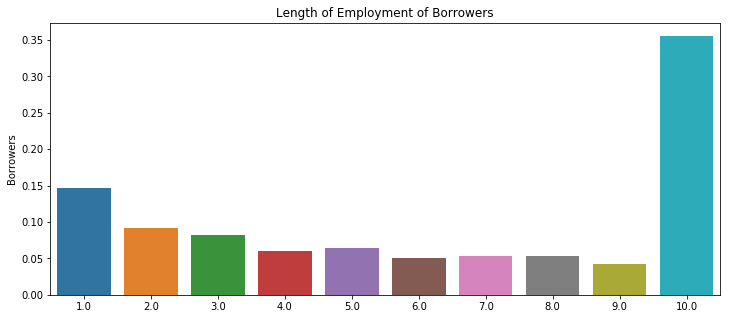

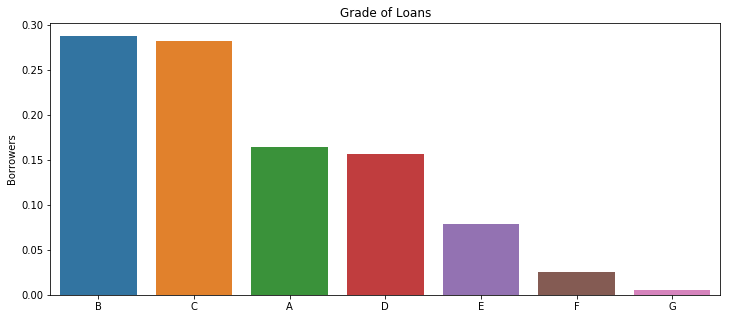

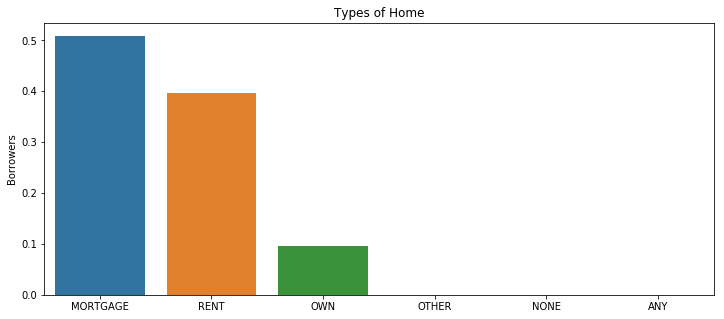

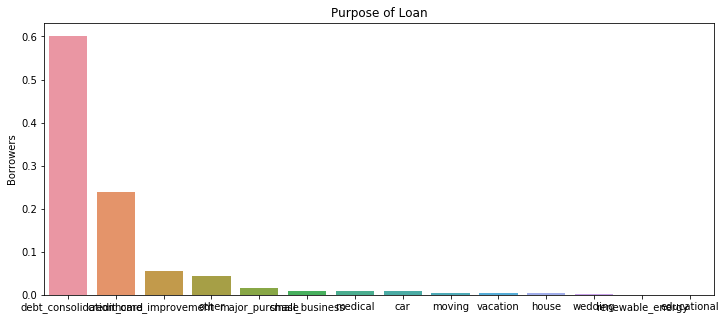

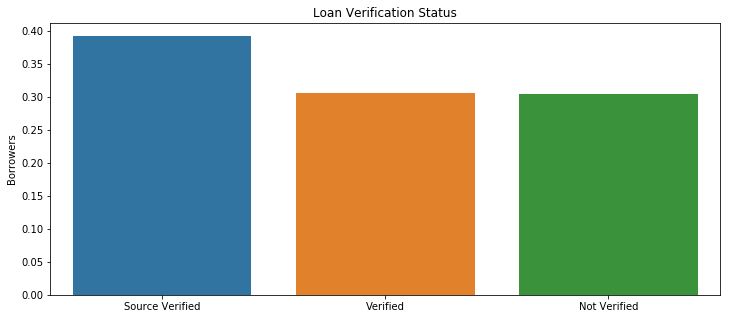

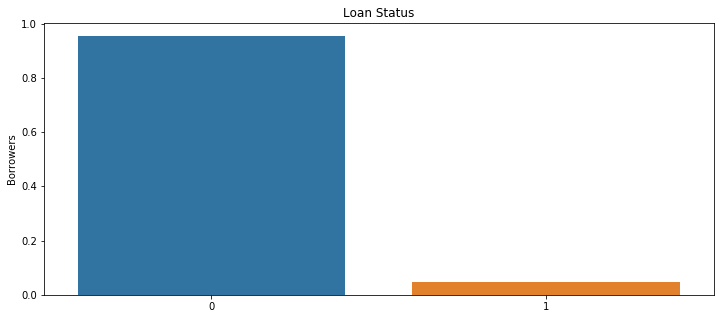

In [39]:
# Now plot the variables

plot('Borrowers','Length of Employment of Borrowers', 'emp_length')
plot('Borrowers','Grade of Loans', 'grade', )    
plot('Borrowers', 'Types of Home', 'home_ownership')
plot('Borrowers', 'Purpose of Loan', 'purpose')
plot('Borrowers','Loan Verification Status', 'verification_status')
plot('Borrowers', 'Loan Status', 'default_ind')

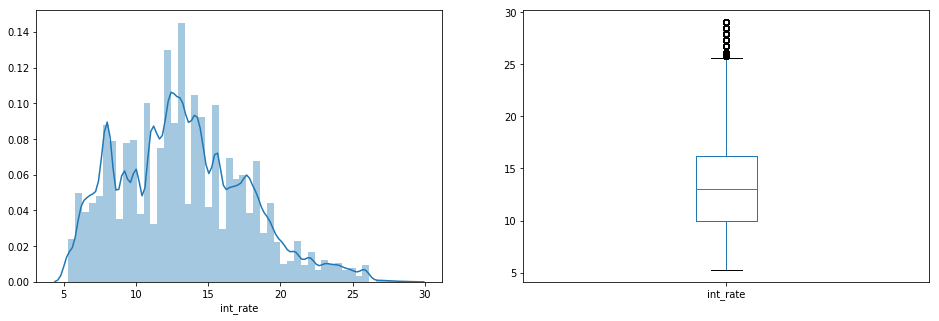

In [40]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(1)
plt.subplot(121)
sns.distplot(credit_data['int_rate']);

plt.subplot(122)
credit_data['int_rate'].plot.box(figsize=(16,5))

plt.show()

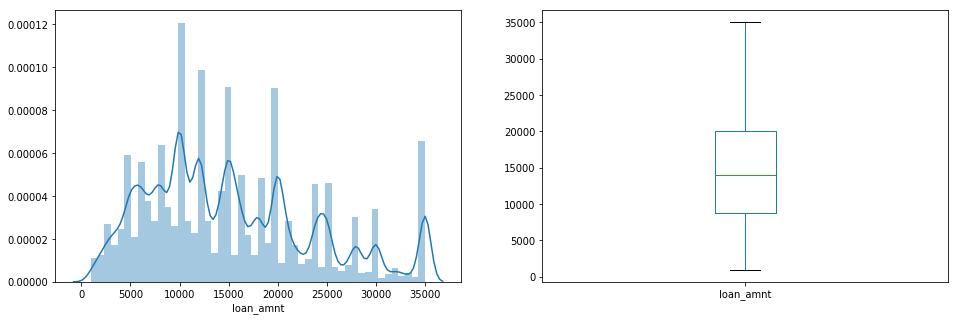

In [41]:
plt.figure(1)
plt.subplot(121)
sns.distplot(credit_data['loan_amnt']);

plt.subplot(122)
credit_data['loan_amnt'].plot.box(figsize=(16,5))

plt.show()

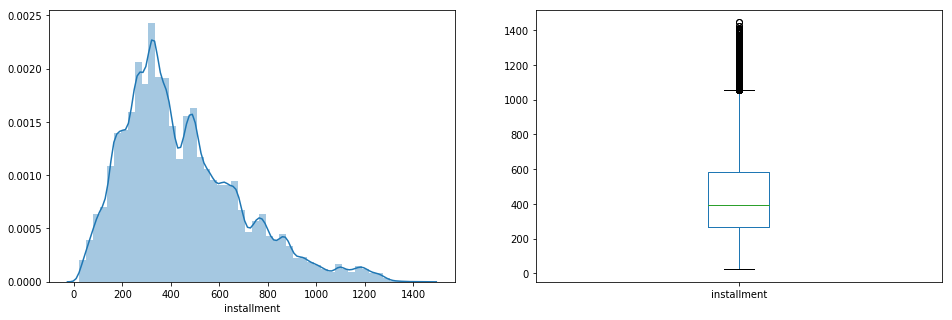

In [42]:
plt.figure(1)
plt.subplot(121)
sns.distplot(credit_data['installment']);

plt.subplot(122)
credit_data['installment'].plot.box(figsize=(16,5))

plt.show()

In [43]:
## Feature Engineering 
## Keeping those variables which are relevant for modelling

credit_data['amt_difference'] = 'eq'
credit_data.loc[ ( credit_data['funded_amnt'] - credit_data['funded_amnt_inv']) > 0, 'amt_difference' ] = 'less'

In [44]:
credit_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,amt_difference
39694,27050.0,27050.0,27050.0,36,10.99,885.46,B,B2,10.0,OWN,55000.0,Verified,Dec-2013,debt_consolidation,MI,22.87,0.0,Oct-1986,0.0,34.149943,14.0,0.0,36638.0,61.2,27.0,w,10018.90,10018.90,21251.04,21251.04,17031.10,4219.94,0.0,0.0,0.0,Jan-2016,885.46,Feb-2016,Dec-2015,0.0,0.0,114834.0,59900.0,0,eq
39695,9750.0,9750.0,9750.0,36,13.98,333.14,C,C1,1.0,RENT,26000.0,Not Verified,Dec-2013,debt_consolidation,CA,25.12,0.0,Jan-2007,0.0,34.149943,12.0,0.0,7967.0,52.8,28.0,f,3710.96,3710.96,7994.83,7994.83,6039.04,1955.79,0.0,0.0,0.0,Jan-2016,333.14,Feb-2016,Jan-2016,0.0,0.0,14123.0,15100.0,0,eq
39696,12000.0,12000.0,12000.0,36,6.62,368.45,A,A2,10.0,MORTGAGE,105000.0,Not Verified,Dec-2013,debt_consolidation,CT,14.05,0.0,Mar-1994,1.0,43.000000,12.0,0.0,13168.0,21.6,22.0,w,4266.62,4266.62,8842.80,8842.80,7733.38,1109.42,0.0,0.0,0.0,Jan-2016,368.45,Feb-2016,Jan-2016,0.0,0.0,267646.0,61100.0,0,eq
39697,12000.0,12000.0,12000.0,36,13.53,407.40,B,B5,10.0,RENT,40000.0,Source Verified,Dec-2013,debt_consolidation,NM,16.94,0.0,Oct-1998,0.0,53.000000,7.0,2.0,5572.0,68.8,32.0,w,0.00,0.00,13359.77,13359.77,11999.99,1359.78,0.0,0.0,0.0,Sep-2015,119.17,Feb-2016,Jan-2016,0.0,15386.0,13605.0,8100.0,0,eq
39698,15000.0,15000.0,15000.0,36,8.90,476.30,A,A5,2.0,MORTGAGE,63000.0,Not Verified,Dec-2013,debt_consolidation,FL,16.51,0.0,Mar-1998,0.0,34.000000,8.0,0.0,11431.0,74.2,29.0,w,5449.27,5449.27,11431.20,11431.20,9550.73,1880.47,0.0,0.0,0.0,Jan-2016,476.30,Feb-2016,Jan-2016,0.0,1514.0,272492.0,15400.0,0,eq


In [45]:
# Make categorical

credit_data[ 'delinq_2yrs_cat' ] = 'no'
credit_data.loc[ credit_data [ 'delinq_2yrs' ] > 0, 'delinq_2yrs_cat' ] = 'yes'


In [46]:
credit_data[ 'inq_last_6mths_cat' ] = 'no'
credit_data.loc[ credit_data['inq_last_6mths' ] > 0, 'inq_last_6mths_cat' ] = 'yes'

In [47]:
credit_data[ 'pub_rec_cat' ] = 'no'
credit_data.loc[ credit_data['pub_rec'] > 0,'pub_rec_cat' ] = 'yes'

In [48]:
credit_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,amt_difference,delinq_2yrs_cat,inq_last_6mths_cat,pub_rec_cat
39694,27050.0,27050.0,27050.0,36,10.99,885.46,B,B2,10.0,OWN,55000.0,Verified,Dec-2013,debt_consolidation,MI,22.87,0.0,Oct-1986,0.0,34.149943,14.0,0.0,36638.0,61.2,27.0,w,10018.90,10018.90,21251.04,21251.04,17031.10,4219.94,0.0,0.0,0.0,Jan-2016,885.46,Feb-2016,Dec-2015,0.0,0.0,114834.0,59900.0,0,eq,no,no,no
39695,9750.0,9750.0,9750.0,36,13.98,333.14,C,C1,1.0,RENT,26000.0,Not Verified,Dec-2013,debt_consolidation,CA,25.12,0.0,Jan-2007,0.0,34.149943,12.0,0.0,7967.0,52.8,28.0,f,3710.96,3710.96,7994.83,7994.83,6039.04,1955.79,0.0,0.0,0.0,Jan-2016,333.14,Feb-2016,Jan-2016,0.0,0.0,14123.0,15100.0,0,eq,no,no,no
39696,12000.0,12000.0,12000.0,36,6.62,368.45,A,A2,10.0,MORTGAGE,105000.0,Not Verified,Dec-2013,debt_consolidation,CT,14.05,0.0,Mar-1994,1.0,43.000000,12.0,0.0,13168.0,21.6,22.0,w,4266.62,4266.62,8842.80,8842.80,7733.38,1109.42,0.0,0.0,0.0,Jan-2016,368.45,Feb-2016,Jan-2016,0.0,0.0,267646.0,61100.0,0,eq,no,yes,no
39697,12000.0,12000.0,12000.0,36,13.53,407.40,B,B5,10.0,RENT,40000.0,Source Verified,Dec-2013,debt_consolidation,NM,16.94,0.0,Oct-1998,0.0,53.000000,7.0,2.0,5572.0,68.8,32.0,w,0.00,0.00,13359.77,13359.77,11999.99,1359.78,0.0,0.0,0.0,Sep-2015,119.17,Feb-2016,Jan-2016,0.0,15386.0,13605.0,8100.0,0,eq,no,no,yes
39698,15000.0,15000.0,15000.0,36,8.90,476.30,A,A5,2.0,MORTGAGE,63000.0,Not Verified,Dec-2013,debt_consolidation,FL,16.51,0.0,Mar-1998,0.0,34.000000,8.0,0.0,11431.0,74.2,29.0,w,5449.27,5449.27,11431.20,11431.20,9550.73,1880.47,0.0,0.0,0.0,Jan-2016,476.30,Feb-2016,Jan-2016,0.0,1514.0,272492.0,15400.0,0,eq,no,no,no


In [49]:
credit_data.tail()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,amt_difference,delinq_2yrs_cat,inq_last_6mths_cat,pub_rec_cat
855964,10000.0,10000.0,10000.0,36,11.99,332.10,B,B5,8.0,RENT,31000.0,Verified,Jan-2015,debt_consolidation,CA,28.69,0.0,Sep-2004,0.0,34.149943,9.0,1.0,14037.0,82.1,15.0,f,7055.47,7055.47,3971.88,3971.88,2944.53,1027.35,0.0,0.0,0.0,Jan-2016,332.10,Feb-2016,Jan-2016,0.0,0.0,25274.0,17100.0,0,eq,no,no,yes
855965,24000.0,24000.0,24000.0,36,11.99,797.03,B,B5,10.0,MORTGAGE,79000.0,Verified,Jan-2015,home_improvement,NJ,3.90,0.0,Mar-1974,1.0,26.000000,5.0,0.0,8621.0,84.5,23.0,f,16933.26,16933.26,9532.39,9532.39,7066.74,2465.65,0.0,0.0,0.0,Jan-2016,797.03,Feb-2016,Jan-2016,0.0,0.0,140285.0,10200.0,0,eq,no,yes,no
855966,13000.0,13000.0,13000.0,60,15.99,316.07,D,D2,5.0,RENT,35000.0,Verified,Jan-2015,debt_consolidation,TN,30.90,0.0,Sep-2003,0.0,34.149943,9.0,1.0,11031.0,61.3,22.0,w,11155.50,11155.50,3769.74,3769.74,1844.50,1925.24,0.0,0.0,0.0,Jan-2016,316.07,Feb-2016,Jan-2016,0.0,0.0,34178.0,18000.0,0,eq,no,no,yes
855967,12000.0,12000.0,12000.0,60,19.99,317.86,E,E3,1.0,RENT,64400.0,Source Verified,Jan-2015,debt_consolidation,MA,27.19,1.0,Oct-2003,2.0,22.000000,17.0,0.0,8254.0,30.6,20.0,w,10447.31,10447.31,3787.67,3787.67,1552.69,2234.98,0.0,0.0,0.0,Jan-2016,317.86,Feb-2016,Jan-2016,1.0,0.0,58418.0,27000.0,0,eq,yes,yes,no
855968,20000.0,20000.0,20000.0,36,11.99,664.20,B,B5,10.0,RENT,100000.0,Verified,Jan-2015,credit_card,FL,10.83,0.0,Dec-2001,1.0,34.149943,8.0,1.0,33266.0,79.8,10.0,f,14110.94,14110.94,7943.76,7943.76,5889.06,2054.70,0.0,0.0,0.0,Jan-2016,664.20,Feb-2016,Jan-2016,0.0,0.0,33307.0,41700.0,0,eq,no,yes,yes


In [50]:
# Create new metric
credit_data['acc_ratio'] = credit_data.open_acc / credit_data.total_acc
credit_data['acc_ratio']

39694     0.518519
39695     0.428571
39696     0.545455
39697     0.218750
39698     0.275862
39699     0.473684
39700     0.428571
39701     0.800000
39702     0.409091
39703     0.192308
39704     0.566667
39705     0.483871
39706     0.416667
39707     0.750000
39708     0.358974
39709     1.000000
39710     0.833333
39711     0.375000
39712     0.707317
39713     0.361111
39714     0.625000
39715     0.500000
39716     0.343750
39717     0.285714
39718     0.384615
39719     0.358974
39720     0.590909
39721     0.437500
39722     0.642857
39723     0.342857
            ...   
855936    0.360000
855937    0.285714
855938    0.320000
855939    0.555556
855940    0.541667
855941    0.288889
855942    0.533333
855943    0.800000
855944    0.562500
855946    0.448276
855947    0.444444
855948    0.714286
855950    0.476190
855951    0.440000
855952    0.407407
855953    0.533333
855954    0.428571
855955    0.433333
855956    0.750000
855957    0.281250
855958    0.214286
855959    0.

# Feature Engineering

In [51]:
## Feature Selection
## Final Features to be needed for modelling

final_features = [
            'loan_amnt', 'amt_difference', 'term', 
            'installment', 'grade','emp_length',
            'home_ownership', 'annual_inc','verification_status',
            'purpose', 'dti', 'delinq_2yrs_cat', 'inq_last_6mths_cat', 
            'open_acc', 'pub_rec', 'pub_rec_cat', 'acc_ratio', 'initial_list_status',
            'issue_d','default_ind'
           ]

In [52]:
credit_data_final = credit_data[final_features]

In [53]:
# Drop any residual missing values
credit_data_final.dropna( axis=0, how = 'any', inplace = True )

In [54]:
## We will divide our dataset into Train and Test 
## The train ( June 2007 - May 2015 ) and out-of-time test ( June 2015 - Dec 2015 ) data

credit_data_final.shape

(739035, 20)

In [55]:
credit_data_final.columns

Index(['loan_amnt', 'amt_difference', 'term', 'installment', 'grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'purpose', 'dti', 'delinq_2yrs_cat', 'inq_last_6mths_cat', 'open_acc',
       'pub_rec', 'pub_rec_cat', 'acc_ratio', 'initial_list_status', 'issue_d',
       'default_ind'],
      dtype='object')

In [56]:
out_of_time = ['Jun-2015', 'Jul-2015', 'Aug-2015', 'Sep-2015', 'Oct-2015', 'Nov-2015', 'Dec-2015']


In [57]:
train_dataset = credit_data_final.loc [ -credit_data_final.issue_d.isin(out_of_time) ]

In [58]:
out_of_time_test = credit_data_final.loc [ credit_data_final.issue_d.isin(out_of_time) ]

In [59]:
train_dataset.shape

(504958, 20)

In [60]:
out_of_time_test.shape

(234077, 20)

In [61]:
## To transform Categorical Variables into Dummy Variables

colname_categorical = ['term','amt_difference', 'grade', 'home_ownership', 'verification_status', 
                            'purpose', 'delinq_2yrs_cat', 'inq_last_6mths_cat', 'initial_list_status', 'pub_rec_cat']

In [62]:
colname_categorical

['term',
 'amt_difference',
 'grade',
 'home_ownership',
 'verification_status',
 'purpose',
 'delinq_2yrs_cat',
 'inq_last_6mths_cat',
 'initial_list_status',
 'pub_rec_cat']

In [63]:
X_train_dataset = pd.get_dummies(train_dataset[train_dataset.columns[:-2]], columns=colname_categorical).astype(float)

In [64]:
y_train_dataset = train_dataset['default_ind']

In [65]:
X_out_of_time_test = pd.get_dummies(out_of_time_test[out_of_time_test.columns[:-2]], columns=colname_categorical).astype(float)

In [66]:
Y_out_of_time_test = out_of_time_test['default_ind']

In [67]:
print(X_train_dataset.shape, X_out_of_time_test.shape)

(504958, 50) (234077, 47)


In [68]:
X_train_dataset.columns

Index(['loan_amnt', 'installment', 'emp_length', 'annual_inc', 'dti',
       'open_acc', 'pub_rec', 'acc_ratio', 'term_36', 'term_60',
       'amt_difference_eq', 'amt_difference_less', 'grade_A', 'grade_B',
       'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G',
       'home_ownership_ANY', 'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'delinq_2yrs_cat_no',
       'delinq_2yrs_cat_yes', 'inq_last_6mths_cat_no',
       'inq_last_6mths_cat_yes', 

In [69]:
X_out_of_time_test.columns

Index(['loan_amnt', 'installment', 'emp_length', 'annual_inc', 'dti',
       'open_acc', 'pub_rec', 'acc_ratio', 'term_36', 'term_60',
       'amt_difference_eq', 'amt_difference_less', 'grade_A', 'grade_B',
       'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G',
       'home_ownership_ANY', 'home_ownership_MORTGAGE', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'delinq_2yrs_cat_no',
       'delinq_2yrs_cat_yes', 'inq_last_6mths_cat_no',
       'inq_last_6mths_cat_yes', 'initial_list_status_f',
       'initial_list_status_w', 'pub_rec_cat_no', 'p

In [70]:
vars_not_in_test = ['home_ownership_NONE','home_ownership_OTHER','purpose_educational']

In [71]:
X_train_dataset.drop( vars_not_in_test , axis = 1, inplace = True )

In [72]:
print(X_train_dataset.shape)

(504958, 47)


In [73]:
#Preprocessing 
#Scaling the variables 
from sklearn.preprocessing import StandardScaler

In [74]:
scaler = StandardScaler()

In [75]:
scaler.fit(X_train_dataset,X_out_of_time_test )

StandardScaler(copy=True, with_mean=True, with_std=True)

In [76]:
X_train_dataset=scaler.transform(X_train_dataset)

In [77]:
X_out_of_time_test=scaler.transform(X_out_of_time_test)

In [78]:
print(X_train_dataset)

[[ 1.43961638  1.79799632  1.08299833 ...  1.11142123  0.41856688
  -0.41856688]
 [-0.62999763 -0.47204577 -1.47840344 ... -0.89974888  0.41856688
  -0.41856688]
 [-0.36082818 -0.32692123  1.08299833 ...  1.11142123  0.41856688
  -0.41856688]
 ...
 [-0.24119731 -0.54220368 -0.34000266 ...  1.11142123 -2.38910449
   2.38910449]
 [-0.36082818 -0.53484676 -1.47840344 ...  1.11142123  0.41856688
  -0.41856688]
 [ 0.59621876  0.88861496  1.08299833 ... -0.89974888 -2.38910449
   2.38910449]]


In [79]:
print(X_out_of_time_test)

[[ 1.1943731   1.25304977 -1.47840344 ...  1.11142123  0.41856688
  -0.41856688]
 [ 0.35695703  0.09743756  0.22919774 ...  1.11142123 -2.38910449
   2.38910449]
 [ 0.11769529 -0.28195769  1.08299833 ...  1.11142123  0.41856688
  -0.41856688]
 ...
 [ 1.1943731   1.79910603 -0.90920305 ...  1.11142123  0.41856688
  -0.41856688]
 [ 1.1943731   1.31638506 -0.34000266 ...  1.11142123  0.41856688
  -0.41856688]
 [ 1.15549307  0.22382044  0.22919774 ...  1.11142123  0.41856688
  -0.41856688]]


In [80]:
y_train_dataset=y_train_dataset.astype(int)

In [81]:
print(y_train_dataset)

39694     0
39695     0
39696     0
39697     0
39698     0
39699     0
39700     0
39701     0
39702     0
39703     0
39704     0
39705     0
39706     0
39707     0
39708     0
39709     0
39710     0
39711     0
39712     0
39713     0
39714     0
39715     0
39716     0
39717     0
39718     0
39719     0
39720     1
39721     0
39722     0
39723     0
         ..
855936    0
855937    0
855938    0
855939    0
855940    0
855941    1
855942    0
855943    0
855944    0
855946    0
855947    0
855948    0
855950    0
855951    0
855952    0
855953    0
855954    0
855955    0
855956    0
855957    0
855958    0
855959    0
855960    0
855962    0
855963    0
855964    0
855965    0
855966    0
855967    0
855968    0
Name: default_ind, Length: 504958, dtype: int32


#  Model Building & Cross Validation

In [82]:
## After feature engineering, we can now move to the model building process. 
## So we will start with logistic regression model and then move over to more complex models 
# like Decision Tree, RandomForest and XGBoost.

###  We will build the following models in this section.

 ## Logistic Regression
 ## Decision Tree
 ## Random Forest
 ## XGBoost

In [83]:
## Import packages for modelling and cross validation

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report

#  Logistic Regression

In [84]:
model = LogisticRegression(random_state=1)
model.fit(X_train_dataset, y_train_dataset)
pred_test = model.predict(X_out_of_time_test)

score = accuracy_score(Y_out_of_time_test,pred_test)
cnf_matrix=confusion_matrix(Y_out_of_time_test,pred_test)
prec_score = metrics.precision_score(Y_out_of_time_test,pred_test)
recal_score = metrics.recall_score(Y_out_of_time_test,pred_test)
print('Accuracy Score is ', score)
print('Precision score is ',prec_score)
print('Recall score is ',recal_score)
print('Confusion Matrix is ', cnf_matrix)
print(classification_report(Y_out_of_time_test,pred_test))

Accuracy Score is  0.9990686825275443
Precision score is  0.0
Recall score is  0.0
Confusion Matrix is  [[233859      1]
 [   217      0]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    233860
          1       0.00      0.00      0.00       217

avg / total       1.00      1.00      1.00    234077



In [85]:
pred_test = model.predict(X_out_of_time_test)

In [86]:
print(np.unique(pred_test))

[0 1]


In [87]:
pred=model.predict_proba(X_out_of_time_test)[:,1]

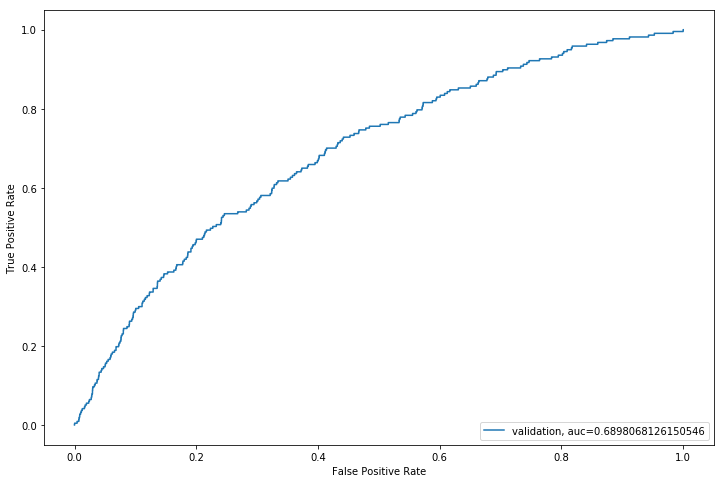

In [88]:
# ROC curve

from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(Y_out_of_time_test, pred, drop_intermediate = False, pos_label = 1)
auc = metrics.roc_auc_score(Y_out_of_time_test, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

#  Decision tree

In [89]:
# Lets Fit decision tree model and Check accuracy score 
from sklearn import tree

model = tree.DecisionTreeClassifier(random_state=1)
model.fit(X_train_dataset, y_train_dataset)
pred_test = model.predict(X_out_of_time_test)
score = accuracy_score(Y_out_of_time_test,pred_test)
cnf_matrix=confusion_matrix(Y_out_of_time_test,pred_test)
prec_score = metrics.precision_score(Y_out_of_time_test,pred_test)
recal_score = metrics.recall_score(Y_out_of_time_test,pred_test)
print('Accuracy Score is ', score)
print('Precision score is ',prec_score)
print('Recall score is ',recal_score)
print('Confusion Matrix is ', cnf_matrix)
print(classification_report(Y_out_of_time_test,pred_test))

Accuracy Score is  0.9256569419464535
Precision score is  0.001219016659894352
Recall score is  0.0967741935483871
Confusion Matrix is  [[216654  17206]
 [   196     21]]
             precision    recall  f1-score   support

          0       1.00      0.93      0.96    233860
          1       0.00      0.10      0.00       217

avg / total       1.00      0.93      0.96    234077



In [90]:
pred_test = model.predict(X_out_of_time_test)

In [91]:
print(np.unique(pred_test))

[0 1]


In [92]:
pred=model.predict_proba(X_out_of_time_test)[:,1]

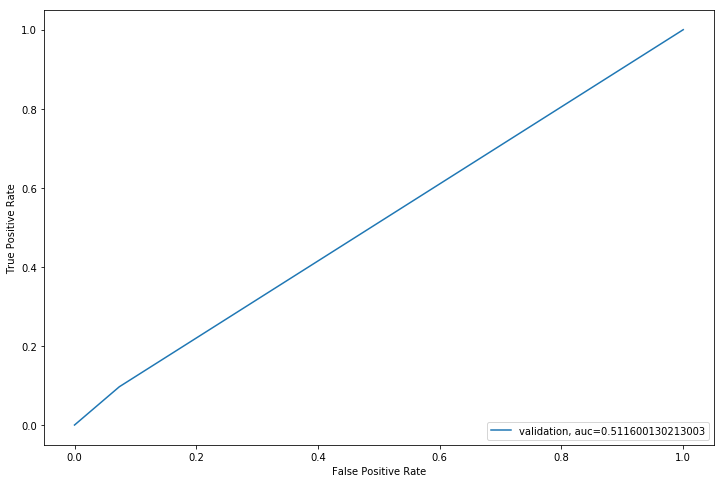

In [93]:
# ROC curve

from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(Y_out_of_time_test, pred, drop_intermediate = False, pos_label = 1)
auc = metrics.roc_auc_score(Y_out_of_time_test, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

# Random Forest

In [94]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=1)
model.fit(X_train_dataset, y_train_dataset)
pred_test = model.predict(X_out_of_time_test)
score = accuracy_score(Y_out_of_time_test,pred_test)
cnf_matrix=confusion_matrix(Y_out_of_time_test,pred_test)
prec_score = metrics.precision_score(Y_out_of_time_test,pred_test)
recal_score = metrics.recall_score(Y_out_of_time_test,pred_test)
print('Accuracy Score is ', score)
print('Precision score is ',prec_score)
print('Recall score is ',recal_score)
print('Confusion Matrix is ', cnf_matrix)
print(classification_report(Y_out_of_time_test,pred_test))

Accuracy Score is  0.997910943834721
Precision score is  0.0036496350364963502
Recall score is  0.004608294930875576
Confusion Matrix is  [[233587    273]
 [   216      1]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    233860
          1       0.00      0.00      0.00       217

avg / total       1.00      1.00      1.00    234077



In [95]:
pred_test = model.predict(X_out_of_time_test)

In [96]:
pred=model.predict_proba(X_out_of_time_test)[:,1]

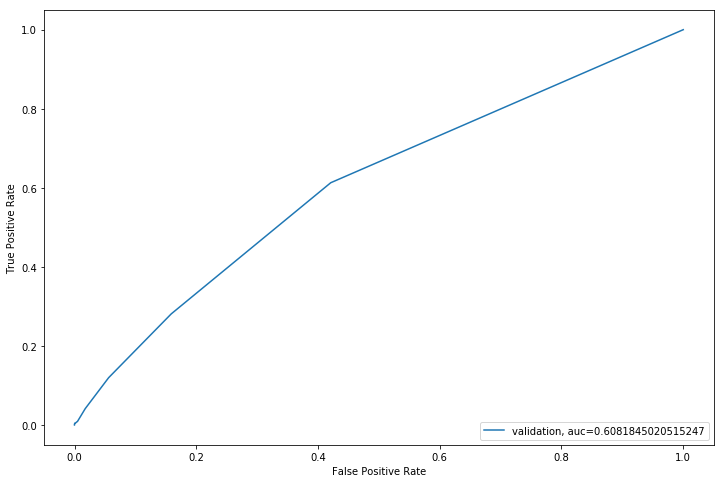

In [97]:
# ROC curve

from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(Y_out_of_time_test, pred, drop_intermediate = False, pos_label = 1)
auc = metrics.roc_auc_score(Y_out_of_time_test, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

# ## XGBoost

In [98]:
from xgboost import XGBClassifier

In [99]:
model = XGBClassifier(n_estimators=50, max_depth=4)
model.fit(X_train_dataset, y_train_dataset)
pred_test = model.predict(X_out_of_time_test)
score = accuracy_score(Y_out_of_time_test,pred_test)
cnf_matrix=confusion_matrix(Y_out_of_time_test,pred_test)
prec_score = metrics.precision_score(Y_out_of_time_test,pred_test)
recal_score = metrics.recall_score(Y_out_of_time_test,pred_test)
print('Accuracy Score is ', score)
print('Precision score is ',prec_score)
print('Recall score is ',recal_score)
print('Confusion Matrix is ', cnf_matrix)
print(classification_report(Y_out_of_time_test,pred_test))

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy Score is  0.9990729546260418
Precision score is  0.0
Recall score is  0.0
Confusion Matrix is  [[233860      0]
 [   217      0]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    233860
          1       0.00      0.00      0.00       217

avg / total       1.00      1.00      1.00    234077



In [100]:
pred_test = model.predict(X_out_of_time_test)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [101]:
pred=model.predict_proba(X_out_of_time_test)[:,1]

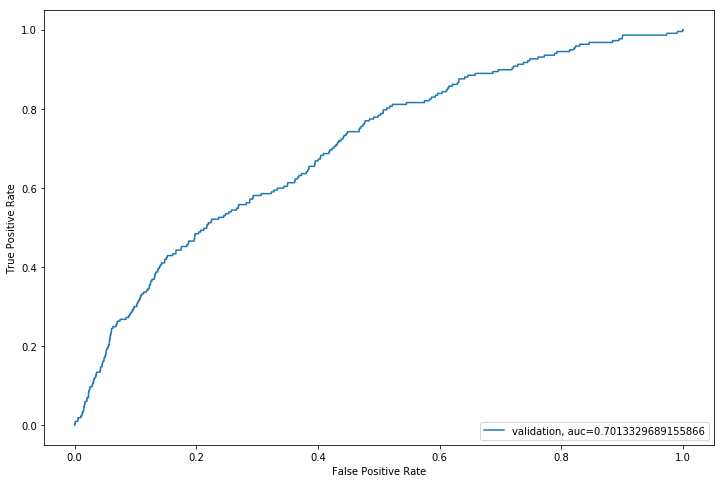

In [102]:
# ROC curve

from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(Y_out_of_time_test, pred, drop_intermediate = False, pos_label = 1)
auc = metrics.roc_auc_score(Y_out_of_time_test, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [103]:
## A look at the performance tells us that the techniques are not peforming well as the recall is very poor. An important reason for this can be that the classes are unbalanced. 
## So we will try another iteration but this time by balancing classes.

## Here is where a good business understanding of the practical situation comes in handy, 
## getting good recall is more important than getting good precision, because 
## as a banker I would be more concerned about catching more defaulters 
## to minimize my losses rather than being very right all the time!

In [104]:
## To balance the classes , we use up-sampling the minority class.
## Up-sampling is the process of randomly duplicating observations from the minority class in order to reinforce its signal.

## There are several heuristics for doing so, but the most common way is to simply resample with replacement.


In [105]:
train_dataset['default_ind'].value_counts()

0    471342
1     33616
Name: default_ind, dtype: int64

In [106]:
## First, We'll import the resampling module from Scikit-Learn

from sklearn.utils import resample

In [107]:
### Next, we'll create a new DataFrame with an up-sampled minority class. Here are the steps:

## 1) we'll separate observations from each class into different DataFrames.
## 2) we'll resample the minority class with replacement, setting the number of samples to match that of the majority class.
## Finally, we'll combine the up-sampled minority class DataFrame with the original majority class DataFrame.

In [108]:
# Separate majority and minority classes

df_majority = train_dataset[train_dataset.default_ind==0]
df_minority = train_dataset[train_dataset.default_ind==1]

In [109]:
# Upsample minority class

df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=471342,    # to match majority class
                                 random_state=123) # reproducible results
 

In [110]:
# Combine majority class with upsampled minority class

df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [111]:
# Display new class counts
df_upsampled.default_ind.value_counts()

1    471342
0    471342
Name: default_ind, dtype: int64

In [112]:
## The same process we will do with Test dataset

In [113]:
out_of_time_test['default_ind'].value_counts()

0    233860
1       217
Name: default_ind, dtype: int64

In [114]:
# Separate majority and minority classes
df_test_majority = out_of_time_test[out_of_time_test.default_ind==0]
df_test_minority = out_of_time_test[out_of_time_test.default_ind==1]

In [115]:
# Upsample minority class

from sklearn.utils import resample
df_test_minority_upsampled = resample(df_test_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=233860,    # to match majority class
                                 random_state=123) # reproducible results
 

In [116]:
# Combine majority class with upsampled minority class
df_test_upsampled = pd.concat([df_test_majority, df_test_minority_upsampled])

In [117]:
# Display new class counts
df_test_upsampled.default_ind.value_counts()

1    233860
0    233860
Name: default_ind, dtype: int64

In [118]:
X_train_dataset_new = pd.get_dummies(df_upsampled[df_upsampled.columns[:-2]], columns=colname_categorical).astype(float)

In [119]:
y_train_dataset_new = df_upsampled['default_ind']

In [120]:
X_out_of_time_test_new = pd.get_dummies(df_test_upsampled[df_test_upsampled.columns[:-2]], columns=colname_categorical).astype(float)

In [121]:
Y_out_of_time_test_new = df_test_upsampled['default_ind']

In [122]:
print(X_train_dataset_new.shape, X_out_of_time_test_new.shape)

(942684, 50) (467720, 47)


In [123]:
X_train_dataset_new.columns

Index(['loan_amnt', 'installment', 'emp_length', 'annual_inc', 'dti',
       'open_acc', 'pub_rec', 'acc_ratio', 'term_36', 'term_60',
       'amt_difference_eq', 'amt_difference_less', 'grade_A', 'grade_B',
       'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G',
       'home_ownership_ANY', 'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'delinq_2yrs_cat_no',
       'delinq_2yrs_cat_yes', 'inq_last_6mths_cat_no',
       'inq_last_6mths_cat_yes', 

In [124]:
X_out_of_time_test_new.columns

Index(['loan_amnt', 'installment', 'emp_length', 'annual_inc', 'dti',
       'open_acc', 'pub_rec', 'acc_ratio', 'term_36', 'term_60',
       'amt_difference_eq', 'amt_difference_less', 'grade_A', 'grade_B',
       'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G',
       'home_ownership_ANY', 'home_ownership_MORTGAGE', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'delinq_2yrs_cat_no',
       'delinq_2yrs_cat_yes', 'inq_last_6mths_cat_no',
       'inq_last_6mths_cat_yes', 'initial_list_status_f',
       'initial_list_status_w', 'pub_rec_cat_no', 'p

In [125]:
vars_not_in_test = ['home_ownership_NONE','home_ownership_OTHER','purpose_educational']

In [126]:
X_train_dataset_new.drop( vars_not_in_test , axis = 1, inplace = True )

In [127]:
print(X_train_dataset_new.shape, X_out_of_time_test_new.shape)

(942684, 47) (467720, 47)


In [128]:
#Preprocessing 
#Scaling the variables 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_dataset_new,X_out_of_time_test_new )
X_train_dataset_new=scaler.transform(X_train_dataset_new)
X_out_of_time_test_new=scaler.transform(X_out_of_time_test_new)

In [129]:
y_train_dataset_new=y_train_dataset_new.astype(int)

In [130]:
## Now we will do Modelling an dvalidation on balanced dataset

In [131]:
from sklearn.model_selection import cross_val_score
def run_models(X_train_dataset_new,y_train_dataset_new,X_out_of_time_test_new,Y_out_of_time_test_new, model_type= "Balanced"):

    classification_models = { 'Logistic Regression': LogisticRegression(random_state=1),
                             'Decision Tree': tree.DecisionTreeClassifier(random_state=1), 
                             'Random Forest': RandomForestClassifier(random_state=1),
                             'Xgboost Classifier':  XGBClassifier(n_estimators=50, max_depth=4)}
    
    cols = ['Model', 'Accuracy Score', 'Precision score', 'Recall score','Confusion Matrix']

    models_report = pd.DataFrame(columns = cols)
    conf_matrix = dict()

    for clf, clf_name in zip(classification_models.values(), classification_models.keys()):

        clf.fit(X_train_dataset_new, y_train_dataset_new)

        y_pred = clf.predict(X_out_of_time_test_new)
        y_score = clf.predict_proba(X_out_of_time_test_new)[:,1]

        print('computing {} - {} '.format(clf_name, model_type))

        tmp = pd.Series({'model_type': model_type,
                         'Model': clf_name,
                         'Accuracy Score' : accuracy_score(Y_out_of_time_test_new,y_pred),
                         'Precision score': metrics.precision_score(Y_out_of_time_test_new, y_pred),
                         'Recall score': metrics.recall_score(Y_out_of_time_test_new, y_pred),
                         'Confusion Matrix': confusion_matrix(Y_out_of_time_test_new,y_pred)})

        models_report = models_report.append(tmp, ignore_index = True)
        conf_matrix[clf_name] = pd.crosstab(Y_out_of_time_test_new, y_pred, rownames=['True'], colnames= ['Predicted'], margins=False)
        fpr, tpr, thresholds = metrics.roc_curve(Y_out_of_time_test_new, y_score, drop_intermediate = False, pos_label = 1)

        plt.figure(1, figsize=(6,6))
        plt.xlabel('false positive rate')
        plt.ylabel('true positive rate')
        plt.title('ROC curve - {}'.format(model_type))
        plt.plot(fpr, tpr, label = clf_name )
        plt.legend(loc=2, prop={'size':11})
    plt.plot([0,1],[0,1], color = 'black')
    
    return models_report, conf_matrix

computing Logistic Regression - Balanced 
computing Decision Tree - Balanced 
computing Random Forest - Balanced 


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


computing Xgboost Classifier - Balanced 


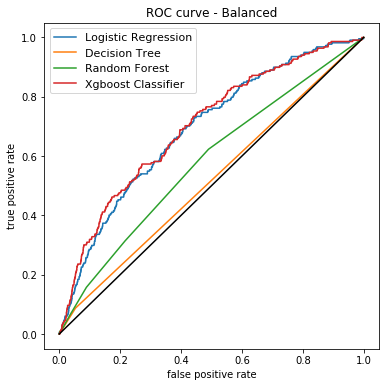

In [132]:
from sklearn.model_selection import train_test_split
#X_train_dataset_new,X_out_of_time_test_new, y_train_dataset_new, Y_out_of_time_test_new = train_test_split(X_train_dataset_new,y_train_dataset_new.values, test_size=0.4, random_state=0)

models_report, conf_matrix = run_models(X_train_dataset_new, y_train_dataset_new, X_out_of_time_test_new, Y_out_of_time_test_new, model_type = "Balanced")

In [133]:
models_report

,Model,Accuracy Score,Precision score,Recall score,Confusion Matrix,model_type
0,Logistic Regression,0.633208,0.648616,0.581369,"[[160205, 73655], [97901, 135959]]",Balanced
1,Decision Tree,0.516995,0.621141,0.087142,"[[221430, 12430], [213481, 20379]]",Balanced
2,Random Forest,0.502386,0.679768,0.009022,"[[232866, 994], [231750, 2110]]",Balanced
3,Xgboost Classifier,0.626212,0.637026,0.586753,"[[155674, 78186], [96642, 137218]]",Balanced
